# Player Segementation Notebook

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("player_rank.csv")
df.head(10)

,name,account_id,rank,games,kills,wins,average_damage,win_ratio,season,game_type,season_length
0,Oilersfan74,account.166d81fc85534147b1b4bf2e537d5077,1,2463,2348,34,116,0.013804,xbox-01,solo,30
1,ALPHA NANOC,account.f396a20e56a94b4ba82b5f4eebd54861,1,2075,10399,429,526,0.206747,xbox-02,solo,173
2,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,2,1755,4955,231,327,0.131624,xbox-02,solo,173
3,WyattEarpXXX,account.d6c2446f5a924e53bb74b286ca1cc9ed,2,1136,4902,171,527,0.150528,xbox-01,solo,30
4,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,3,1209,3424,137,323,0.113317,xbox-01,solo,30
5,JonFriendly,account.14731f042cdb45fa8fd4edb5f47ac29e,3,1649,3575,123,238,0.074591,xbox-02,solo,173
6,XreecyX,account.a0af18f8ce5040a6a3b45029e8adea3c,4,1593,8090,316,534,0.198368,xbox-02,solo,173
7,Brat0069,account.3520dffd3e3944e1893175cfef9e85f5,4,1745,2363,130,153,0.074499,xbox-01,solo,30
8,zCritic,account.dfea3f7020494c53afd7bdd8e2528910,5,1344,7153,212,552,0.157738,xbox-01,solo,30
9,xBindersx,account.6668be42410243cf9446a2d45788b2a2,5,2290,9217,163,430,0.071179,xbox-02,solo,173


In [43]:
new = df.drop([0,1,8])
new

,rank,games,kills,wins,average_damage,win_ratio,game_type,season_length,label
2,2,1755,4955,231,327,0.131624,solo,173,1
3,2,1136,4902,171,527,0.150528,solo,30,1
4,3,1209,3424,137,323,0.113317,solo,30,0
5,3,1649,3575,123,238,0.074591,solo,173,0
6,4,1593,8090,316,534,0.198368,solo,173,1
...,...,...,...,...,...,...,...,...,...
639,496,916,681,8,90,0.008734,solo,30,2
640,497,561,514,12,109,0.021390,solo,30,2
641,498,887,475,6,71,0.006764,solo,30,2
642,499,565,460,27,102,0.047788,solo,30,2


## Correlation Matrix

In [46]:
new.corr()

,rank,games,kills,wins,average_damage,win_ratio,season_length,label
rank,1.000000,-0.439149,-0.493527,-0.395808,-0.246810,-0.212034,-0.501446,0.438243
games,-0.439149,1.000000,0.204886,-0.172013,-0.316621,-0.390690,0.247091,-0.095072
kills,-0.493527,0.204886,1.000000,0.762020,0.774806,0.530559,0.459070,-0.591721
wins,-0.395808,-0.172013,0.762020,1.000000,0.832445,0.893162,0.452942,-0.498190
average_damage,-0.246810,-0.316621,0.774806,0.832445,1.000000,0.850900,0.313797,-0.554684
win_ratio,-0.212034,-0.390690,0.530559,0.893162,0.850900,1.000000,0.312212,-0.410962
season_length,-0.501446,0.247091,0.459070,0.452942,0.313797,0.312212,1.000000,-0.377753
label,0.438243,-0.095072,-0.591721,-0.498190,-0.554684,-0.410962,-0.377753,1.000000


In [49]:
# correlation coefficent using scipy stats
from scipy import stats

stats.pearsonr(new.kills, new.wins)

(0.7620195610563192, 1.0517812701819068e-122)

## Correlation Matrix Heatmap

Text(0.5, 1.0, 'Seaborn')

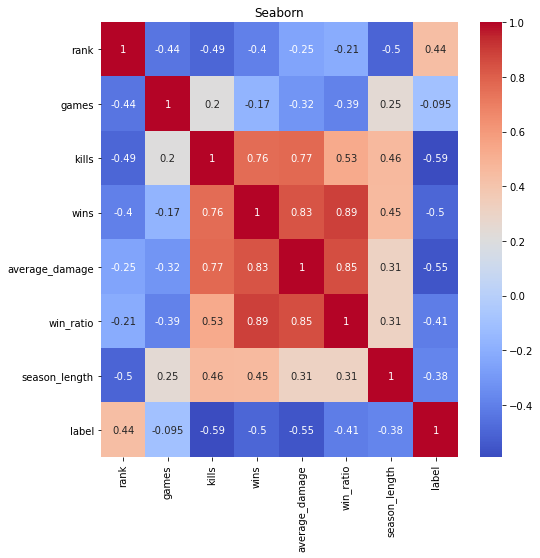

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(new.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


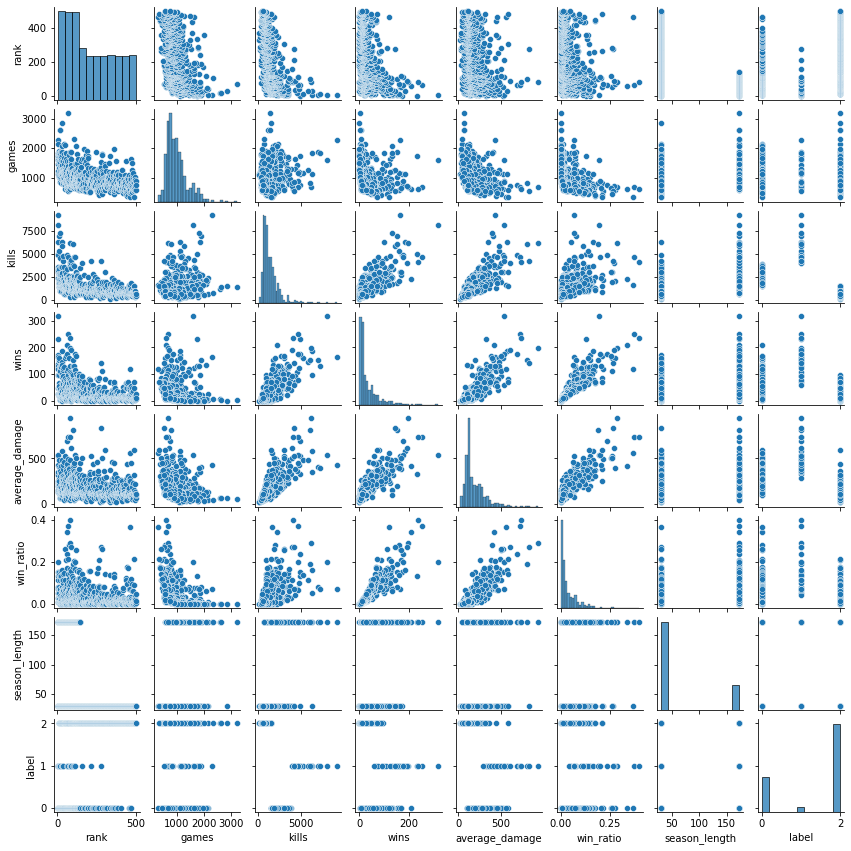

In [53]:
#compare heat matrix and pairplot positive correlations
pubg_pairplot = new.dropna()
sns.pairplot(pubg_pairplot, size=1.5);

C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


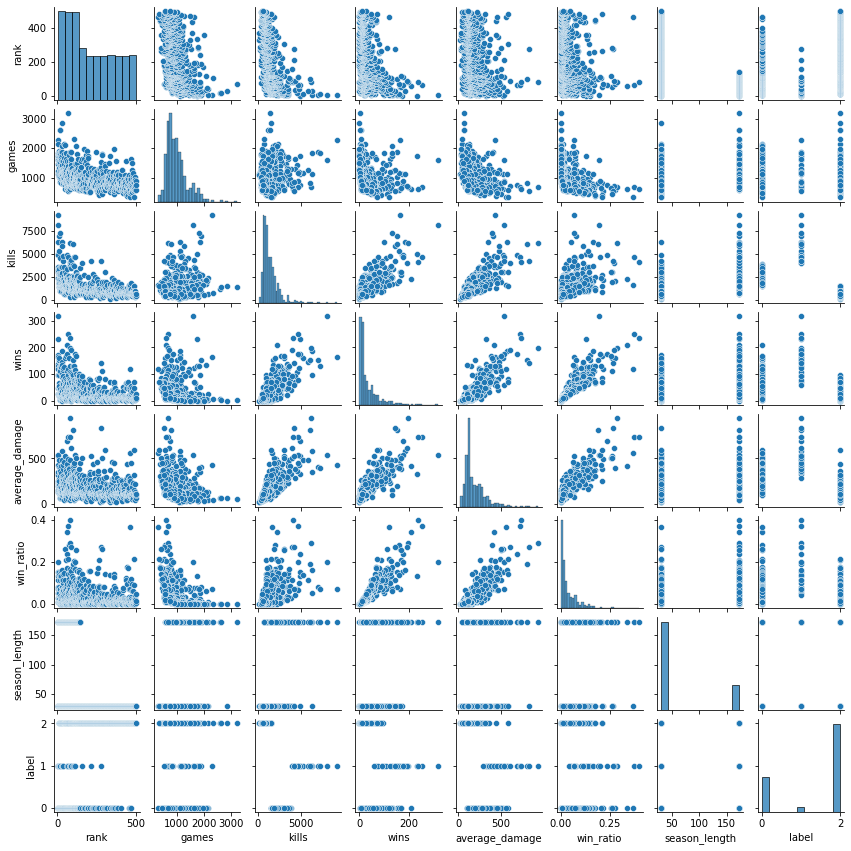

In [58]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)


pair_plot = sns.pairplot(pubg_pairplot, size=1.5);
pair_plot.map_lower(corrfunc);
pair_plot.map_upper(corrfunc);

In [5]:
df.shape

(644, 11)

## Inspect Data from JBZ

In [6]:
df.describe()

,rank,games,kills,wins,average_damage,win_ratio,season_length
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,210.698758,1004.757764,1499.953416,35.781056,188.708075,0.043936,61.975155
std,148.647378,395.400453,1155.703808,45.020820,124.483850,0.057457,59.628497
min,1.000000,321.000000,139.000000,0.000000,20.000000,0.000000,30.000000
25%,81.000000,724.750000,816.250000,9.000000,111.000000,0.008857,30.000000
50%,178.500000,916.000000,1152.500000,17.000000,137.000000,0.020233,30.000000
75%,339.250000,1191.750000,1772.000000,49.000000,246.750000,0.060615,30.000000
max,500.000000,3212.000000,10399.000000,429.000000,939.000000,0.398990,173.000000


In [7]:
df.dtypes

name               object
account_id         object
rank                int64
games               int64
kills               int64
wins                int64
average_damage      int64
win_ratio         float64
season             object
game_type          object
season_length       int64
dtype: object

In [8]:
df.isnull().sum()

name              0
account_id        0
rank              0
games             0
kills             0
wins              0
average_damage    0
win_ratio         0
season            0
game_type         0
season_length     0
dtype: int64

## Begin Analysis

C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

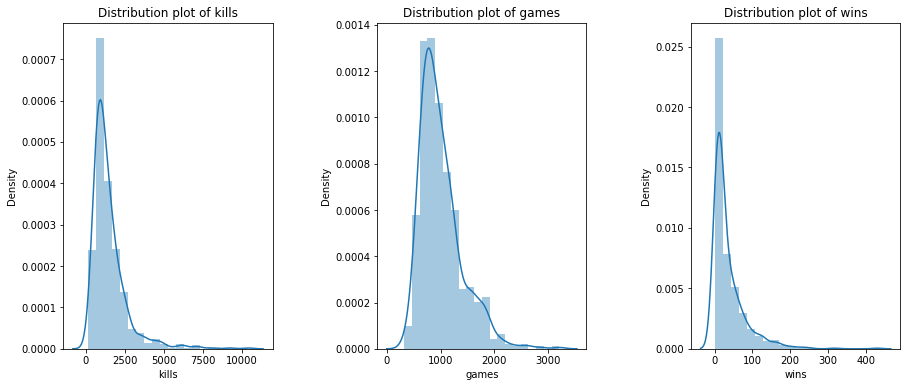

In [9]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['kills', 'games', 'wins']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distribution plot of {}'.format(x))
plt.show()

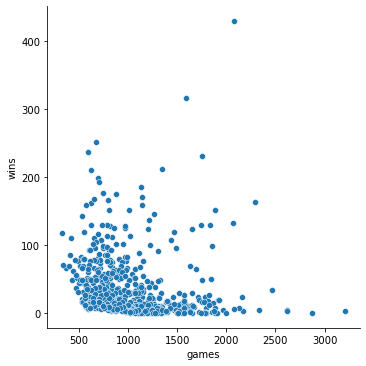

In [10]:
sns.relplot(x='games', y = 'wins', data=df)

## Elbow Test to look for ideal number of clusters

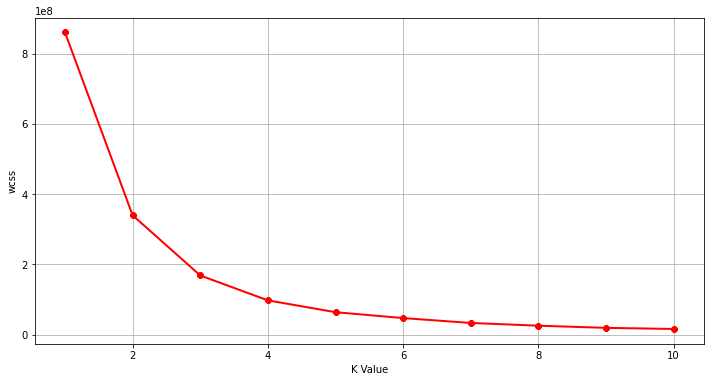

In [11]:
x1 = df.loc[:, ['kills', 'wins']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

## Inspect clusters

In [12]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x1)
print(label)

[1 2 2 2 1 1 2 1 2 2 1 1 2 1 2 1 1 0 1 1 1 1 1 1 2 1 2 0 0 1 0 2 1 0 1 1 1
 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 2 2 1 1 0 1 0 0 2 1 1 1 1 0 1
 0 2 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 2 0 0 0 1 2 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 0 2 1 1 1 1 2 0 0 1 0 1 1 0 1 1 2 2 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 2 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 2 0 0 1 1
 0 2 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 

## Check Centroids

In [13]:
print(kmeans.cluster_centers_)


[[ 957.71846847   18.3536036 ]
 [2244.1734104    59.87283237]
 [5648.18518519  168.        ]]


## Wins and Kills Cluster

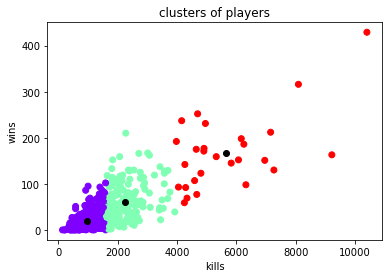

In [14]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("clusters of players")
plt.xlabel("kills")
plt.ylabel("wins")
plt.show()

## Rank and Win Ratio Cluster

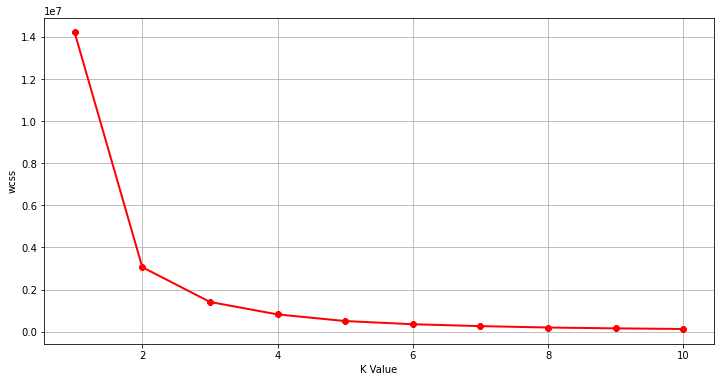

In [15]:
x2 = df.loc[:, ['rank', 'win_ratio']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(x2)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [17]:
print(kmeans.cluster_centers_)

[[1.00357143e+02 5.34346377e-02]
 [3.67500000e+02 3.04369964e-02]]


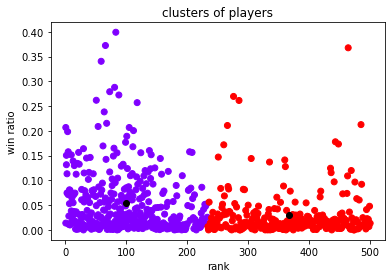

In [18]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("clusters of players")
plt.xlabel("rank")
plt.ylabel("win ratio")
plt.show()

## Average Damage and Win Ratio Segmentation


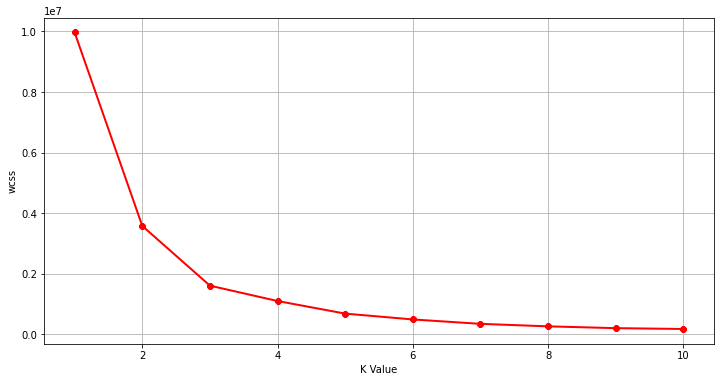

In [19]:
x3 = df.loc[:, ['average_damage', 'win_ratio']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x3)
print(label)

[0 1 2 1 2 2 1 0 1 1 0 2 2 2 1 0 0 0 2 2 2 2 2 0 1 2 1 0 0 2 0 2 0 0 2 0 0
 0 0 2 0 0 0 2 1 0 0 0 0 0 0 2 2 2 0 0 2 0 0 1 1 2 2 0 0 0 0 2 2 2 2 2 0 2
 0 1 2 2 0 2 1 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 2 0 2 0
 0 0 0 0 2 1 0 0 2 0 2 1 0 2 0 1 0 2 0 2 1 2 0 0 1 0 0 0 0 0 2 2 0 1 2 0 2
 0 2 2 0 2 2 0 0 0 2 1 0 1 2 2 0 2 1 0 0 2 0 2 2 0 0 2 1 2 0 0 2 0 2 2 2 2
 0 0 2 0 2 2 0 0 2 0 0 2 0 0 1 1 2 2 0 0 0 0 2 2 1 2 0 2 2 2 0 0 1 2 2 2 2
 0 1 0 0 2 0 0 0 0 0 0 2 1 2 2 0 0 0 0 0 2 0 2 2 0 2 0 0 2 2 0 2 0 0 2 2 2
 0 0 2 0 0 2 0 0 2 2 0 2 2 2 0 0 2 0 0 2 2 2 2 0 0 0 0 2 0 2 0 1 2 0 0 0 0
 0 0 0 2 2 1 0 2 0 2 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0
 2 0 2 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 1 0 2 0 2 0 2 2 0 2 2 2 0
 0 0 2 2 2 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2
 0 0 0 0 1 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0
 0 0 0 2 0 2 0 2 0 1 2 0 

In [21]:
print(kmeans.cluster_centers_)

[[1.15790244e+02 1.51780415e-02]
 [5.24931818e+02 1.82461173e-01]
 [2.68194737e+02 7.39118185e-02]]


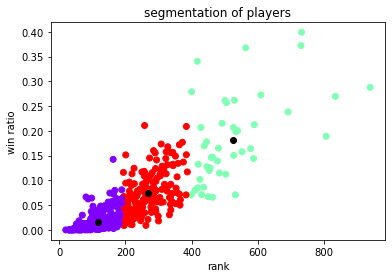

In [22]:
plt.scatter(x3[:,0], x3[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("segmentation of players")
plt.xlabel("rank")
plt.ylabel("win ratio")
plt.show()

## Further Segmentation Analysis

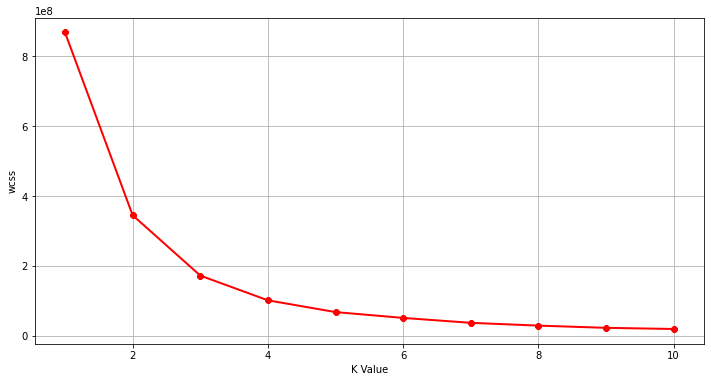

In [23]:
x4 = df.loc[:, ['average_damage', 'win_ratio', 'kills']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x4)
print(label)

[1 2 2 2 1 1 2 1 2 2 1 1 2 1 2 1 1 0 1 1 1 1 1 1 2 1 2 0 0 1 0 2 1 0 1 1 1
 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 2 2 1 1 0 1 0 0 2 1 1 1 1 0 1
 0 2 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 2 0 0 0 1 2 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 0 2 1 1 1 2 2 0 0 1 0 1 1 0 1 1 2 2 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 2 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 2 0 0 1 1
 0 2 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 

In [25]:
print(kmeans.cluster_centers_)

[[1.34020362e+02 2.52756639e-02 9.54866516e+02]
 [2.73212644e+02 7.34803290e-02 2.22698851e+03]
 [5.26857143e+02 1.54896908e-01 5.58653571e+03]]


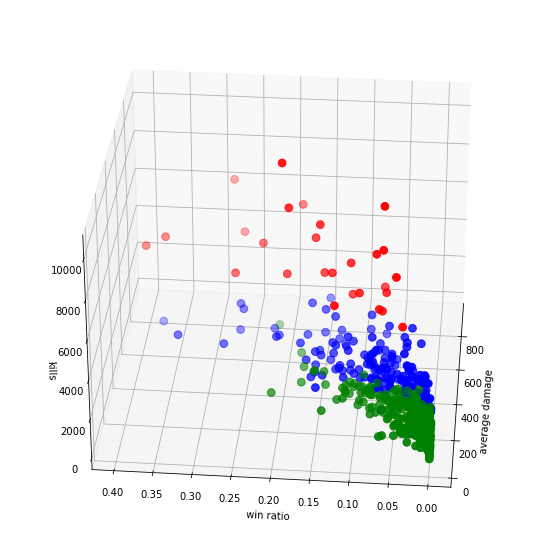

In [26]:
clusters = kmeans.fit_predict(x4)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.average_damage[df.label == 0],df["win_ratio"][df.label == 0], df["kills"][df.label == 0], c="blue", s=60)
ax.scatter(df.average_damage[df.label == 1],df["win_ratio"][df.label == 1], df["kills"][df.label == 1], c="red", s=60)
ax.scatter(df.average_damage[df.label == 2],df["win_ratio"][df.label == 2], df["kills"][df.label == 2], c="green", s=60)
ax.view_init(30, 185)


plt.xlabel("average damage")
plt.ylabel("win ratio")
ax.set_zlabel("kills")

plt.show()


<bound method DataFrame.corr of                 name                                account_id  rank  games  \
0        Oilersfan74  account.166d81fc85534147b1b4bf2e537d5077     1   2463   
1        ALPHA NANOC  account.f396a20e56a94b4ba82b5f4eebd54861     1   2075   
2         XIISJagobo  account.55ff3a6b5c964172a677104edeb8f2ce     2   1755   
3       WyattEarpXXX  account.d6c2446f5a924e53bb74b286ca1cc9ed     2   1136   
4         XIISJagobo  account.55ff3a6b5c964172a677104edeb8f2ce     3   1209   
..               ...                                       ...   ...    ...   
639  FredyMercsTeeth  account.4f81907a8ea44ed88dcd6456e36bbda5   496    916   
640  DMaintenanceMan  account.1fa4256076144155b45f674956af82dc   497    561   
641        celsorico  account.08c7062c36774f8abbfb60f6646113ba   498    887   
642     JustPhilly69  account.931cf2e9ba90427b9a1662e7522ba1fa   499    565   
643           Krayyz  account.75cfd210686243c8bc947fd244f000e4   500    744   

     kills  wins  a